# MSDS 430 Milestone 2

#### Complete the following and submit your notebook, html and data file to Canvas. Your completed notebook should include all output, i.e. run each cell and save your file before submitting.

<font color=blue> In this second milestone you will continue working with the building prices dataset. Here you run Python code to fix bad data detected in Milestone 1.  Follow the steps carefully and watch what happens when you correct the data.  You may want to run some of this code in Spyder do quick review and sort of the data.
You will need the numpy and matplotlib packages for this assignment.</font>

Start by providing a list of the errors you plan to correct from Milestone 1:

List of errors that need changing found in Milestone 1 are as follows:

    Records with 9999 for variables in living_space and age_home
        Record number was 22
    Records with 0 for variables in taxes, lot_size, and living_space
        Record numbers were 4, 5, 22, and 26
        Since age_home 0 values are included in records 4 and 26 these probably should be changed as well (0 garages not included).
    Duplicate records should be eliminated and these are at record numbers 16 through 20.
    
    The following cells show the records that need changing (changes made 'df2' are shown at the end of the notebook):


In [28]:
#Records with 9999 for variables living_space and age_home
df.loc[(df['living_space'] == 9999) | (df['age_home'] == 9999)]
#Records with 0 for variables taxes, lot_size, and living_space
df.loc[(df['taxes'] == 0) | (df['lot_size'] == 0) | (df['living_space'] == 0)]

,price,taxes,bathrooms,lot_size,living_space,num_garage,num_rooms,num_bedrms,age_home,num_fplaces
4,29.9,5.060,1.0,0.000,1.121,1.0,6,3,0,0
5,29.9,0.000,1.0,4.455,0.988,1.0,6,3,56,0
22,37.9,0.000,1.0,5.520,9999.000,2.0,6,3,9999,1
26,38.9,8.361,1.5,9.150,0.000,2.0,8,4,0,1


In [29]:
#Records of duplicates except for first occurence.
df[df.duplicated()]

,price,taxes,bathrooms,lot_size,living_space,num_garage,num_rooms,num_bedrms,age_home,num_fplaces
16,30.9,5.959,1.0,6.666,1.121,2.0,6,3,32,0
17,30.0,5.050,1.0,5.000,1.020,0.0,5,2,46,1
18,36.9,8.246,1.5,5.150,1.664,2.0,8,4,50,0
19,41.9,6.697,1.5,6.902,1.488,1.5,7,3,22,1
20,40.5,7.784,1.5,7.102,1.376,1.0,6,3,17,0


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
df = pd.read_csv('building prices 2018-1.csv')
df.columns = [s.lower() for s in df.columns]



Correlations are a good look:

In [31]:
#df2 is shown at the end, values sorted by price.
corr = df[df.columns].corr()
corr.sort_values(by=['price'], inplace=True, ascending = False)
print(corr)

                 price     taxes  bathrooms  lot_size  living_space  \
price         1.000000  0.589096   0.742073  0.606545      0.099648   
bathrooms     0.742073  0.586638   1.000000  0.390975     -0.147673   
lot_size      0.606545  0.489010   0.390975  1.000000     -0.034538   
taxes         0.589096  1.000000   0.586638  0.489010     -0.529982   
num_rooms     0.520735  0.527409   0.531055  0.325648     -0.101863   
num_garage    0.416992  0.242113   0.238496  0.212292      0.209678   
num_bedrms    0.293422  0.328326   0.433624  0.131475     -0.045628   
num_fplaces   0.228521 -0.086144   0.153522  0.258775      0.306138   
living_space  0.099648 -0.529982  -0.147673 -0.034538      1.000000   
age_home      0.096283 -0.533123  -0.149398 -0.036475      0.999960   

              num_garage  num_rooms  num_bedrms  age_home  num_fplaces  
price           0.416992   0.520735    0.293422  0.096283     0.228521  
bathrooms       0.238496   0.531055    0.433624 -0.149398     0.153522  

Scatter plots are a good way to reveal relationships between the target variable, price and each explanatory variable.  And, they will provide visual detail for some of the bad data.  To run this code for other input variables, change the variable name 'age_home' in the code line scat(df, 'age_home', 'price') to one of the other variables.

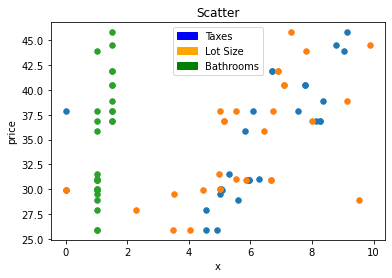

In [32]:
#df2 is shown at the end

#Adjusted slightly to see differences in variables on the same plot
def scat(dataframe,var1,var2):     
    plt.scatter(dataframe[var1],dataframe[var2], s = 30)     
    plt.title('Scatter')     
    plt.xlabel("x")
    plt.ylabel(var2)
    blue_patch = mpatches.Patch(color='blue', label='Taxes')
    orange_patch = mpatches.Patch(color='orange', label='Lot Size')
    green_patch = mpatches.Patch(color='green', label='Bathrooms')
    plt.legend(handles=[blue_patch, orange_patch, green_patch])   

#Lot_size and taxes seem to have similar scales
scat(df, 'taxes', 'price')
scat(df,'lot_size', 'price')
scat(df,'bathrooms', 'price')

#Age_home does not look good nor does living_space because of 0 and 9999 values in the data
#scat(df,'age_home', 'price')
#scat(df, 'living_space','price')

#Looking at the correlation table in the above, the highest correlation to price are number of bathrooms, lot_size comes 
#second, and taxes come third. However, when looking at a scatterplot of all three variables it looks as though taxes have a 
#closer (linear) relationship to price with regards to variability (versus lot size). Bathrooms does not seem to say much 
#visually as it is a nominal measurement that ranges from 1 to 1.5. 0 values in taxes seem to have had an effect on the 
#correlation value in relation to price and its place in the table.



Zero values definitely causing problems.

Note, there are 5 duplicate records in this DataFrame.  What do you think?  Should they be dropped?  Your choice.   

In [33]:
df1 = df.drop_duplicates(keep='first')
print('Number of Records:', len(df))
print('Number of Records:', len(df1))

Number of Records: 29
Number of Records: 24


Next is some code for fixing out of range values and some 0 values.  Apply these where you think they should be.  The choice here was to replace with a median, mean is also a good choice.

Note the choice here to start with df2 = df1.copy().  If the choice had been df2 = df1, later changes made to df2 would also have been made to df1.  Be careful of this in all of your programming.

In [34]:
df2 = df1.copy()
df2=df2.replace({'living_space': {9999: 0}})
df2=df2.replace({'age_home': {9999: 0}})
m = np.median(df2.taxes[df2.taxes>0])
df2=df2.replace({'taxes': {0: m}})
n = np.median(df2.lot_size[df2.lot_size>0])
df2=df2.replace({'lot_size': {0: n}})
p = np.median(df2.living_space[df2.living_space>0])
df2=df2.replace({'living_space': {0: p}})
q = np.median(df2.age_home[df2.age_home>0])
df2=df2.replace({'age_home': {0: q}})

Good idea to take a look at the corrected DataFrame.

In [35]:
dfdesc = df2.describe(include = "all")
dfdesc

,price,taxes,bathrooms,lot_size,living_space,num_garage,num_rooms,num_bedrms,age_home,num_fplaces
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,34.629167,6.494958,1.166667,6.090792,1.376542,1.312500,6.500000,3.166667,36.041667,0.250000
std,6.012702,1.491552,0.240772,1.936369,0.262751,0.604557,0.884652,0.564660,13.889249,0.442326
min,25.900000,4.543000,1.000000,2.275000,0.975000,0.000000,5.000000,2.000000,3.000000,0.000000
25%,29.900000,5.240000,1.000000,4.997000,1.161500,1.000000,6.000000,3.000000,30.000000,0.000000
50%,33.700000,6.021000,1.000000,5.850000,1.432000,1.000000,6.000000,3.000000,32.000000,0.000000
75%,38.150000,7.873000,1.500000,7.158000,1.516000,2.000000,7.000000,3.250000,47.000000,0.250000
max,45.800000,9.142000,1.500000,9.890000,1.831000,2.000000,8.000000,4.000000,62.000000,1.000000


In [36]:
#Records that needed changing have changed
df2.loc[[4,5,22,26]]

,price,taxes,bathrooms,lot_size,living_space,num_garage,num_rooms,num_bedrms,age_home,num_fplaces
4,29.9,5.060,1.0,5.850,1.121,1.0,6,3,32.0,0
5,29.9,6.021,1.0,4.455,0.988,1.0,6,3,56.0,0
22,37.9,6.021,1.0,5.520,1.432,2.0,6,3,32.0,1
26,38.9,8.361,1.5,9.150,1.432,2.0,8,4,32.0,1


<div class="alert alert-block alert-success"><b> Problem 1 Rerun the correlations and scatter plots for your corrected DataFrame df2.  How does it look now?  Which single variable would you choose to predict price?</b></div>

In [37]:
#Correlations df2 sorted by price
corr2 = df2[df2.columns].corr()
corr2.sort_values(by=['price'], inplace=True, ascending = False)
print(corr2)

                 price     taxes  bathrooms  lot_size  living_space  \
price         1.000000  0.878568   0.709777  0.632456      0.719465   
taxes         0.878568  1.000000   0.647127  0.660702      0.644244   
living_space  0.719465  0.644244   0.666874  0.479647      1.000000   
bathrooms     0.709777  0.647127   1.000000  0.397303      0.666874   
lot_size      0.632456  0.660702   0.397303  1.000000      0.479647   
num_rooms     0.528444  0.643835   0.510310  0.380146      0.600522   
num_garage    0.461468  0.455324   0.224022  0.191461      0.345542   
num_bedrms    0.281520  0.370768   0.426401  0.144578      0.511030   
num_fplaces   0.266878  0.122065   0.204124  0.292759      0.064626   
age_home     -0.426302 -0.410172  -0.132180 -0.419405     -0.171243   

              num_garage  num_rooms    num_bedrms  age_home   num_fplaces  
price           0.461468   0.528444  2.815200e-01 -0.426302  2.668783e-01  
taxes           0.455324   0.643835  3.707681e-01 -0.410172  1.220

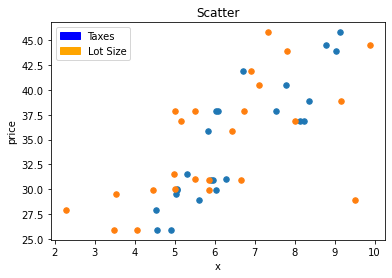

In [38]:
#Adjusted slightly to see difference in variables on the same plot
def scat(dataframe,var1,var2):     
    plt.scatter(dataframe[var1],dataframe[var2], s = 30)     
    plt.title('Scatter')     
    plt.xlabel("x")
    plt.ylabel(var2)
    blue_patch = mpatches.Patch(color='blue', label='Taxes')
    orange_patch = mpatches.Patch(color='orange', label='Lot Size')
    plt.legend(handles=[blue_patch, orange_patch]) 
    
#Lot_size and taxes seem to have similar scales
scat(df2, 'taxes', 'price')
scat(df2,'lot_size', 'price')

#scat(df2,'age_home', 'price') #Negative correlation

#scat(df2, 'living_space','price')
#scat(df2, 'bathrooms','price')

#Though living_space and bathrooms are in the top 3 in relation to price (along with taxes being at the top) in the correlation 
#table based on the adjusted dataframe (df2), they do not seem to show a close relationship to price visually. Again bathrooms 
#are a nominal measurement, so it does not make sense to compare it to price. However, living_space is not a nominal 
#measurement, yet it seems to show a lot of variation when compared to taxes and price, and lot_size and price. The scatter 
#plot for living_space in relation to price is shown in the next cell. It maybe that the data for living_space needs to be 
#transformed (regression) for comparative purposes as it comes in at the second highest in the correlation table in relation 
#to price based on the adjusted dataframe (df2).

#Additionally, now looking at the scatter plot of taxes and lot_size versus price in comparison to the updated correlation 
#table, there is a lot more sense to be made from it. Based on the correlation table with the adjusted dataframe, 
#it is evident that lot_size does not have a closer (postive) relationship to price,and taxes do. The elimination of the zero 
#values have had a significant effect on the table and it now closely matches the scatterplot.



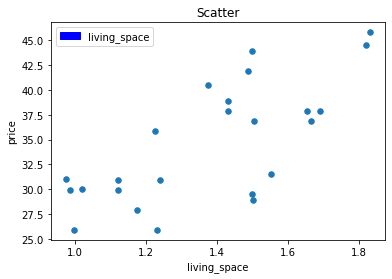

In [39]:
#Scatterplot for living_space
def scat(dataframe,var1,var2):     
    plt.scatter(dataframe[var1],dataframe[var2], s = 30)     
    plt.title('Scatter')     
    plt.xlabel(var1)
    plt.ylabel(var2)
    blue_patch = mpatches.Patch(color='blue', label=var1)
    plt.legend(handles=[blue_patch]) 
scat(df2, 'living_space', 'price')

In conclusion, the correlation table based on the original data frame showed that bathrooms, a nominal measurement, had the highest correlation to price. Lot_size came second, then taxes. However, when looking at a scatterplot of all three variables it seemed that taxes had a closer (linear/postive) relationship to price. The 0 values in taxes seemed to have significantly affected the correlation calculation. The 0 and 9999 values in living_space also seemed to have affected the correlation calculation (0.0997). With the adjusted data frame (df2), taxes in relation to price is at the top of the list in the correlation table (0.8786). Living_space comes in second (0.7195) in the adjusted data frame, while it was second to last in the table based off the original data frame. Whether or not duplicated records had a significant influence on correlation values in the original dataframe is uncertain and would require further analysis.

As lot_sizes in df2 becomes 4th on the list of the correlation table, the correlated value with price seems to be accurately reflected in the adjusted scatterplot in comparison to taxes. As taxes in relation to price has the highest value in the correlation table based on the adjusted dataframe (df2), I would choose that variable to predict price. However, it may also be beneficial to analyze living_space as well. Although the scatterplot on living_space looks like there is a lot of noise, further analysis on that variable may prove to be fruitful.
